<a href="https://colab.research.google.com/github/dipalishinde112003/Dipali_Shinde/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# Loading datasets
customer_data = pd.read_csv("Customers.csv")
product_data = pd.read_csv("Products.csv")
transaction_data = pd.read_csv("Transactions.csv")

# Quick glimpse of the data
print("Preview of Customer Data:")
print(customer_data.head(3))

print("\nPreview of Product Data:")
print(product_data.head(3))

print("\nPreview of Transaction Data:")
print(transaction_data.head(3))


Preview of Customer Data:
  CustomerID      CustomerName         Region  SignupDate
0      C0001  Lawrence Carroll  South America  2022-07-10
1      C0002    Elizabeth Lutz           Asia  2022-02-13
2      C0003    Michael Rivera  South America  2024-03-07

Preview of Product Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12

Preview of Transaction Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  


In [8]:
# Checking the structure of each dataset
print("\nCustomer Data Overview:")
print(customer_data.info())
print("Missing values in Customer Data:", customer_data.isnull().sum())

print("\nProduct Data Overview:")
print(product_data.info())
print("Missing values in Product Data:", product_data.isnull().sum())

print("\nTransaction Data Overview:")
print(transaction_data.info())
print("Missing values in Transaction Data:", transaction_data.isnull().sum())

# Exploring statistical details
print("\nStatistical Summary of Transaction Data:")
print(transaction_data.describe())

# Checking for duplicates
print("\nDuplicates in Customer Data:", customer_data.duplicated().sum())
print("Duplicates in Product Data:", product_data.duplicated().sum())
print("Duplicates in Transaction Data:", transaction_data.duplicated().sum())



Customer Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
Missing values in Customer Data: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Product Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
Missing values in Pr

In [9]:
# Converting date columns into datetime format
customer_data['SignupDate'] = pd.to_datetime(customer_data['SignupDate'])
transaction_data['TransactionDate'] = pd.to_datetime(transaction_data['TransactionDate'])

# Dropping any duplicates found
customer_data = customer_data.drop_duplicates()
product_data = product_data.drop_duplicates()
transaction_data = transaction_data.drop_duplicates()

# Ensuring IDs match across datasets
missing_customers = set(transaction_data['CustomerID']) - set(customer_data['CustomerID'])
missing_products = set(transaction_data['ProductID']) - set(product_data['ProductID'])

print(f"\nCustomers in Transactions not in Customer Data: {len(missing_customers)}")
print(f"Products in Transactions not in Product Data: {len(missing_products)}")



Customers in Transactions not in Customer Data: 0
Products in Transactions not in Product Data: 0



Number of Customers by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


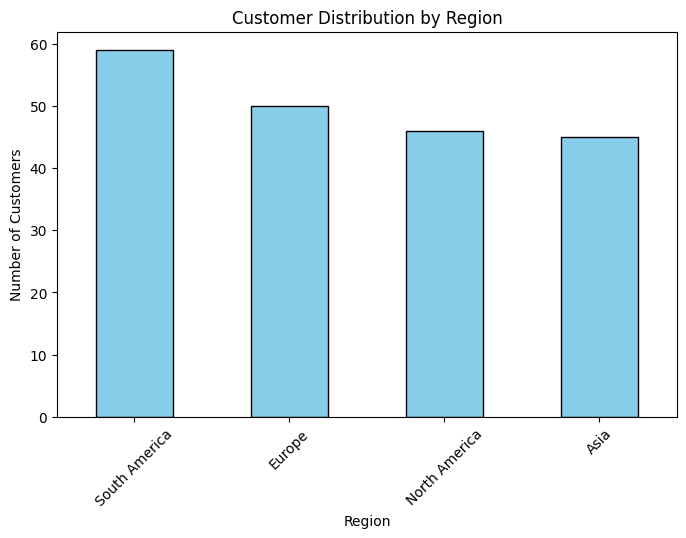


Customer Signups by Year:
SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


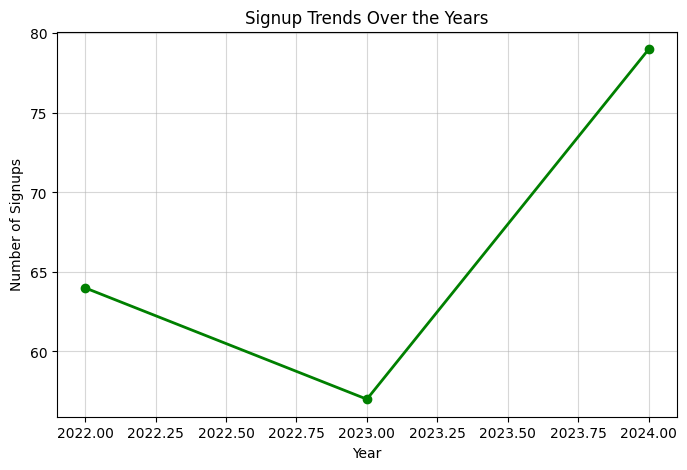

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Customers by region
region_distribution = customer_data['Region'].value_counts()
print("\nNumber of Customers by Region:")
print(region_distribution)

# Bar plot for region distribution
plt.figure(figsize=(8, 5))
region_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Signups over the years
signup_years = customer_data['SignupDate'].dt.year.value_counts().sort_index()
print("\nCustomer Signups by Year:")
print(signup_years)

# Line plot for signup trends
plt.figure(figsize=(8, 5))
signup_years.plot(kind='line', marker='o', color='green', linewidth=2)
plt.title('Signup Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.grid(alpha=0.5)
plt.show()



Number of Products by Category:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


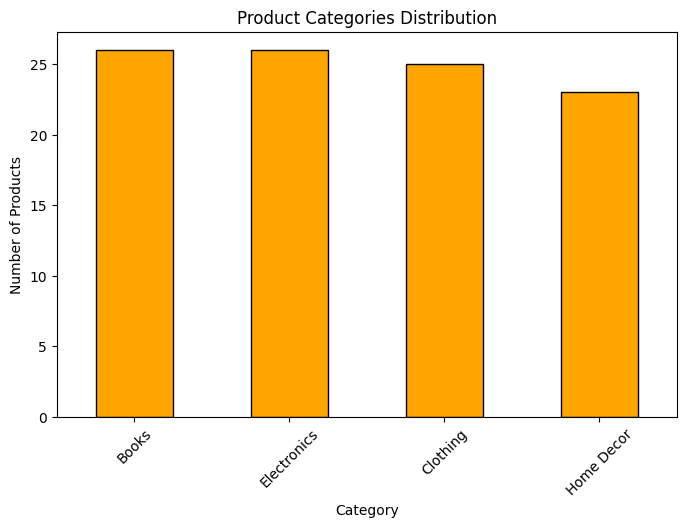

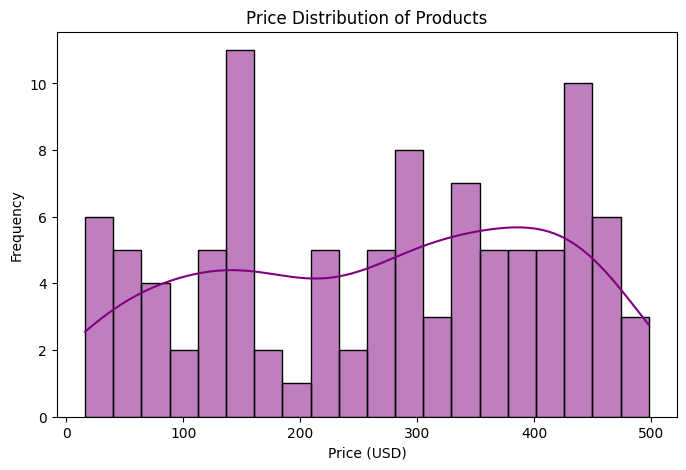

In [11]:
# Product categories
category_summary = product_data['Category'].value_counts()
print("\nNumber of Products by Category:")
print(category_summary)

# Bar plot for product categories
plt.figure(figsize=(8, 5))
category_summary.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Product Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

# Price distribution of products
plt.figure(figsize=(8, 5))
sns.histplot(product_data['Price'], bins=20, kde=True, color='purple', edgecolor='black')
plt.title('Price Distribution of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()



Top 5 Customers by Revenue:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


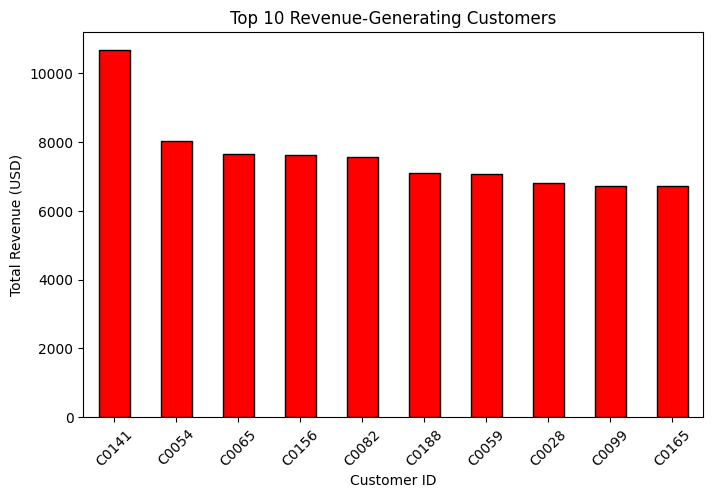


Monthly Transaction Trends:
TransactionDate
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: count, dtype: int64


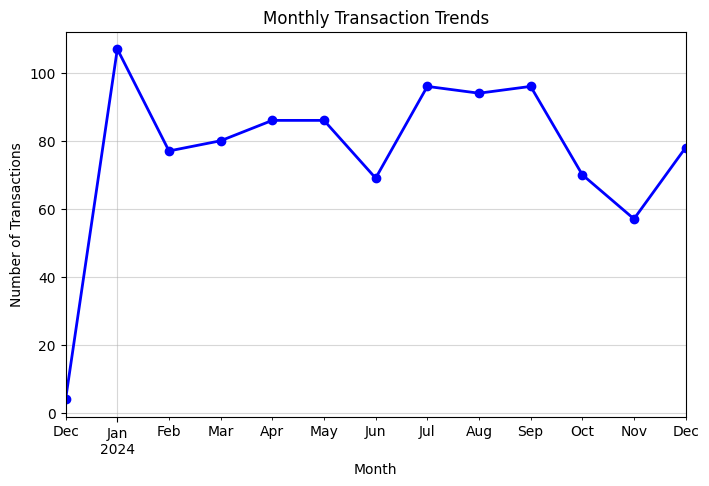

In [12]:
# Total revenue by customer
customer_revenue = transaction_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop 5 Customers by Revenue:")
print(customer_revenue.head())

# Bar plot for top revenue-generating customers
plt.figure(figsize=(8, 5))
customer_revenue.head(10).plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 10 Revenue-Generating Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

# Monthly transaction trends
monthly_trends = transaction_data['TransactionDate'].dt.to_period('M').value_counts().sort_index()
print("\nMonthly Transaction Trends:")
print(monthly_trends)

# Line plot for transaction trends
plt.figure(figsize=(8, 5))
monthly_trends.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(alpha=0.5)
plt.show()
